<a href="https://colab.research.google.com/github/ethanmb/ml-models/blob/main/Hard_Coded_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1.1 Estimating the Coefficients

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $$

In [225]:
def beta1OLS(x, y):
    """
    Calculate the slope (beta1) of the regression line using OLS.

    OLS: Ordinary Least Squares method.
    """
    n = len(x)  # Number of data points
    meanx = sum(x) / n  # Mean of x values
    meany = sum(y) / n  # Mean of y values
    sumNumerator = 0  # Initialize numerator sum for beta1
    sumDenom = 0  # Initialize denominator sum for beta1

    # Calculate sums for numerator and denominator of beta1 formula
    for xi, yi in zip(x,y):
        sumNumerator += (xi - meanx) * (yi - meany)  # Sum of products of deviations
        sumDenom += (xi - meanx) **2  # Sum of squared deviations of x

    return round(sumNumerator/sumDenom, 3)  # Return slope (beta1)

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x} $$

In [226]:
def beta0OLS(x, y, b1):
    """
    Calculate the y-intercept (beta0) of the regression line using OLS.

    OLS: Ordinary Least Squares method.
    """
    xbar = sum(x) / len(x)  # Mean of x values
    ybar = sum(y) / len(x)  # Mean of y values
    return round(ybar - b1*xbar, 3)  # Return y-intercept (beta0)

$$ RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1} x_1)^2 + (y_2 - \hat{\beta_0} - \hat{\beta_1} x_2)^2 + \dots + (y_n - \hat{\beta_0} - \hat{\beta_1} x_n)^2 $$

In [227]:
def residiualSumSquares(x, y, b0, b1):
    """
    Calculate the Residual Sum of Squares (RSS) for the regression line.

    RSS: Measure of the discrepancy between observed and estimated values.
    """
    rss = 0  # Initialize RSS
    # Calculate squared residuals for each data point and sum them
    for xi, yi, in zip(x,y):
        rss += (yi - b0 - b1*xi) ** 2  # Squared difference between observed and estimated y
    return round(rss, 3)  # Return RSS

$$Y ≈ β_{0} + β_{1}X$$

In [228]:
def simpleLinearRegression(x, y):
    """
    Perform simple linear regression to find slope, y-intercept, and RSS.

    Returns slope (beta1), y-intercept (beta0), and RSS.
    """
    b1 = beta1OLS(x, y)  # Calculate slope (beta1)
    b0 = beta0OLS(x, y, b1)  # Calculate y-intercept (beta0) using beta1
    rss = residiualSumSquares(x, y, b0, b1)  # Calculate RSS using beta0 and beta1

    return b1, b0, rss  # Return slope, y-intercept, and RSS


# Simple Example Usage

In [204]:
# Example usage:
x = [1, 2, 3, 4, 5]
y = [2.5, 5.1, 7.4, 8.9, 12]

m, b, rss = simpleLinearRegression(x,y)
print(f"Slope (m): {m}")
print(f"Y-intercept (b): {b}")
print(f"Equation of line: y = {b} + {m}x")
print(f"Residual Sum of Squares: {rss}")

Slope (m): 2.28
Y-intercept (b): 0.34
Equation of line: y = 0.34 + 2.28x
Residual Sum of Squares: 0.484


# Example with random (normally distributed) noise

In [229]:
import numpy as np

# Number of data points
n = 50

# Generate random x values
x = np.linspace(0, 10, n)

# Define a linear relationship with a slope of 2 and an intercept of 5
slope = 2
intercept = 5

# Generate y values based on the linear relationship with added noise
noise = np.random.normal(0, 1, n)  # Normally distributed noise with mean=0 and std=1
y = slope * x + intercept + noise

m, b, rss = simpleLinearRegression(x,y)
print(f"Slope (m): {m}")
print(f"Y-intercept (b): {b}")
print(f"Equation of line: y = {b} + {m}x")
print(f"Residual Sum of Squares: {rss}")

Slope (m): 1.982
Y-intercept (b): 5.045
Equation of line: y = 5.045 + 1.982x
Residual Sum of Squares: 57.264


# 3.1.2 Assessing the Accuracy of the Coefficient Estimates

$RSE = \sqrt{\frac{RSS}{n - 2}}$

In [230]:
def residualStandardError(rss, n):
  return (rss/(n-2)) ** 0.5

$SE(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

In [231]:
def standardErrorSlope(rse, n, x):
  sumDenom = 0
  xbar = sum(x) / len(x)
  for i in x:
    sumDenom += (i-xbar) **2

  return rse/(sumDenom ** 0.5)

$t = \frac{\hat{\beta}_1 - 0}{SE(\hat{\beta}_1)}$

In [232]:
def tStatistic(seB1, b1):
  return (b1 - 0)/seB1

In [233]:
import scipy.stats as stats

def pValue(t_stat, df):
    """Calculate the two-tailed p-value for the t-statistic."""
    # Get the p-value for one tail
    p_one_tail = stats.t.sf(np.abs(t_stat), df)
    # Double it for a two-tailed test
    return 2 * p_one_tail

In [234]:
rse = residualStandardError(rss, len(x))
seB1 = standardErrorSlope(rse, len(x), x)
t = tStatistic(seB1, b)
p = round(pValue(t,len(x) -2), 6)

print(f"Residual Standard Error (RSE): {rse}")
print(f"Coefficient: {b}")
print(f"Standard Error of B1: {seB1}")
print(f"t-statistic: {t}")
print(f"p-value: <={p}")

Residual Standard Error (RSE): 1.0922453936730518
Coefficient: 5.045
Standard Error of B1: 0.052449191100138265
t-statistic: 96.18832805958566
p-value: <=0.0


# 3.1.3 Assessing the Accuracy of the Model

$$TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2$$
$$RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
$$R^2 = 1 - \frac{RSS}{TSS}$$

In [235]:
def totalSumSquares(y):
  runningSum = 0
  ybar = sum(y)/len(y)
  for i in y:
    runningSum += (i - ybar) **2

  return runningSum

In [236]:
tss = totalSumSquares(y)
r2 = 1- (rss/tss)
print(f"R^2 = {r2}")

R^2 = 0.9674795712512761


# Plotting the data points and regression line

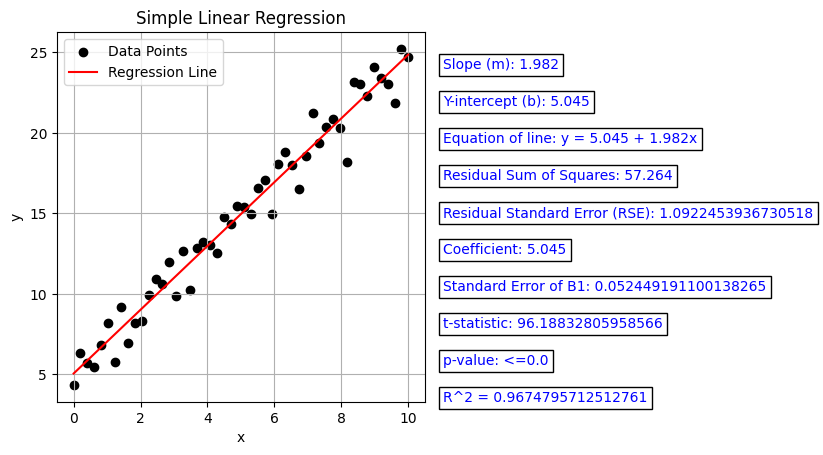

In [237]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='black', label='Data Points')
plt.plot(x, [m*xi + b for xi in x], color='red', label='Regression Line')
#note that the actual equation is y = 5 + 2x, if you uncomment the below it will plot that
#plt.plot(x, slope * x + intercept, color ='blue', label='Population Line')

# Adjusting the subplots to create space for annotations on the right
plt.subplots_adjust(right=0.7)

# Displaying the annotations outside the plot
annotations = [
    f"Slope (m): {m}",
    f"Y-intercept (b): {b}",
    f"Equation of line: y = {b} + {m}x",
    f"Residual Sum of Squares: {rss}",
    f"Residual Standard Error (RSE): {rse}",
    f"Coefficient: {b}",
    f"Standard Error of B1: {seB1}",
    f"t-statistic: {t}",
    f"p-value: <={p}",
    f"R^2 = {r2}"
]

for i, annotation in enumerate(annotations, 1):
    plt.annotate(annotation, xy=(1.05, 1 - i*0.1), xycoords='axes fraction', textcoords='axes fraction', color='blue', bbox=dict(boxstyle="square", fc="w"))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

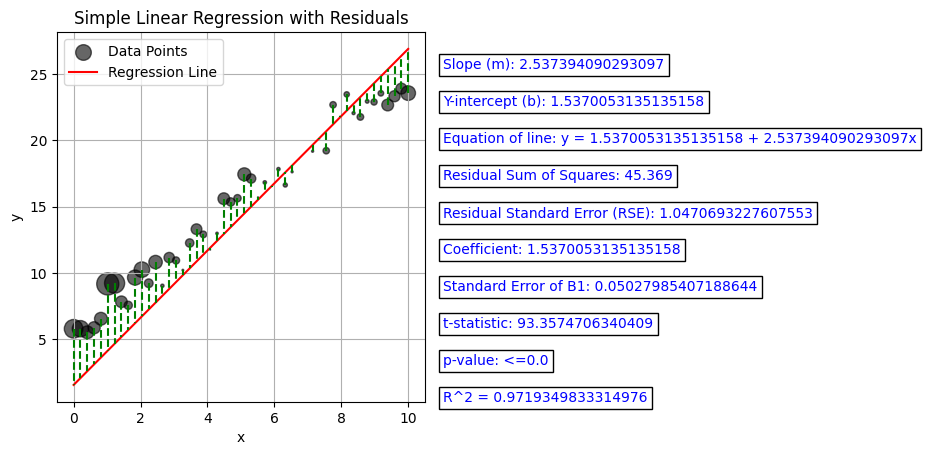

In [224]:
# Calculate squared residuals for each data point
squared_residuals = [(yi - b - m*xi) ** 2 for xi, yi in zip(x, y)]

# Plotting the data points with sizes based on squared residuals
plt.scatter(x, y, s=[res*10 for res in squared_residuals], color='black', label='Data Points', alpha=0.6)

# Plotting the regression line
plt.plot(x, [m*xi + b for xi in x], color='red', label='Regression Line')

# Drawing lines from data points to the regression line to indicate residuals and adding squared residual text
for xi, yi, res in zip(x, y, squared_residuals):
    plt.plot([xi, xi], [yi, m*xi + b], color='green', linestyle='--')

# Adjusting the subplots to create space for annotations on the right
plt.subplots_adjust(right=0.7)

annotations = [
    f"Slope (m): {m}",
    f"Y-intercept (b): {b}",
    f"Equation of line: y = {b} + {m}x",
    f"Residual Sum of Squares: {rss}",
    f"Residual Standard Error (RSE): {rse}",
    f"Coefficient: {b}",
    f"Standard Error of B1: {seB1}",
    f"t-statistic: {t}",
    f"p-value: <={p}",
    f"R^2 = {r2}"
]

for i, annotation in enumerate(annotations, 1):
    plt.annotate(annotation, xy=(1.05, 1 - i*0.1), xycoords='axes fraction', textcoords='axes fraction', color='blue', bbox=dict(boxstyle="square", fc="w"))


plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression with Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Gradient Descent in Action

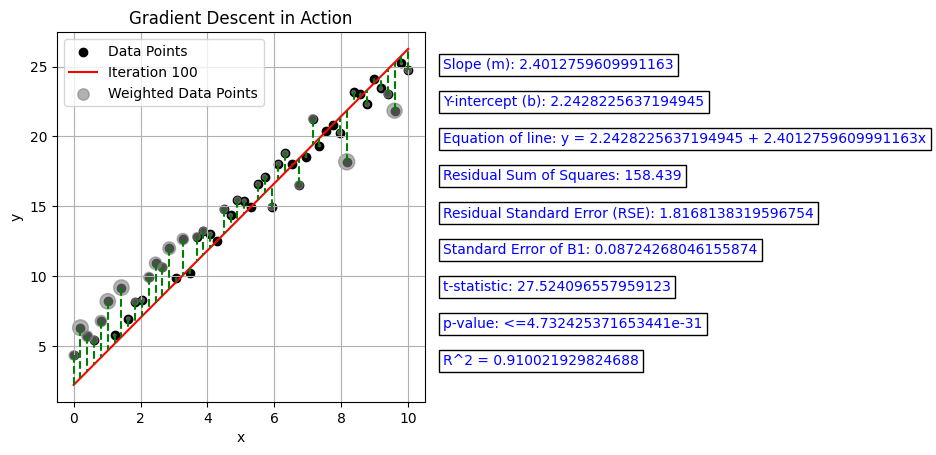

In [250]:
from IPython.display import clear_output
# Hyperparameters
learning_rate = 0.01
num_iterations = 100

# Initialize parameters
m = 0
b = 0


for iteration in range(num_iterations):
    # Clear the current output
    clear_output(wait=True)

    # Calculate predictions
    y_pred = m * x + b

    # Calculate residuals
    residuals = y - y_pred

    # Calculate gradients
    m_gradient = -2 * np.sum(x * residuals) / len(x)
    b_gradient = -2 * np.sum(residuals) / len(x)

    # Update parameters
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient

    # Plotting

    plt.scatter(x, y, color='black', label='Data Points')
    plt.plot(x, y_pred, color='red', label=f'Iteration {iteration + 1}')
    # Calculate squared residuals for each data point
    squared_residuals = [(yi - b - m*xi) ** 2 for xi, yi in zip(x, y)]

    # Plotting the data points with sizes based on squared residuals
    plt.scatter(x, y, s=[res*10 for res in squared_residuals], color='grey', label='Weighted Data Points', alpha=0.6)

    # Drawing lines from data points to the regression line to indicate residuals and adding squared residual text
    for xi, yi, res in zip(x, y, squared_residuals):
        plt.plot([xi, xi], [yi, m*xi + b], color='green', linestyle='--')

    # Adjusting the subplots to create space for annotations on the right
    plt.subplots_adjust(right=0.7)

    annotations = [
        f"Slope (m): {m}",
        f"Y-intercept (b): {b}",
        f"Equation of line: y = {b} + {m}x",
        f"Residual Sum of Squares: {residiualSumSquares(x,y,b,m)}",
        f"Residual Standard Error (RSE): {residualStandardError(residiualSumSquares(x,y,b,m), len(x))}",
        f"Standard Error of B1: {standardErrorSlope(residualStandardError(residiualSumSquares(x,y,b,m), len(x)),len(x), x)}",
        f"t-statistic: {tStatistic(standardErrorSlope(residualStandardError(residiualSumSquares(x,y,b,m), len(x)),len(x), x), m)}",
        f"p-value: <={pValue(tStatistic(standardErrorSlope(residualStandardError(residiualSumSquares(x,y,b,m), len(x)),len(x), x), m), len(x) -2)}",
        f"R^2 = {1-(residiualSumSquares(x,y,b,m)/totalSumSquares(y))}"
    ]

    for i, annotation in enumerate(annotations, 1):
        plt.annotate(annotation, xy=(1.05, 1 - i*0.1), xycoords='axes fraction', textcoords='axes fraction', color='blue', bbox=dict(boxstyle="square", fc="w"))


    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent in Action')
    plt.legend()
    plt.grid(True)
    plt.show()